In [47]:
#Importing needed packages
import numpy as np
import astropy
import matplotlib.pyplot as plt
from helita.sim import rh15d
from astropy.io import fits
from matplotlib import cm
import h5py
from scipy.io import readsav
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.image import NonUniformImage
import tqdm

In [2]:
dpath_simulation ='/mn/stornext/d5/juanms/mpi3druns/2Druns/genohm/rain/l2d90x40rvk/sim_data_rh_it=280-369.hdf5'
input_sim = h5py.File(dpath_simulation,'r')

In [3]:
temp_juan=input_sim['temperature']
vel_juan=input_sim['velocity_z']
z    = input_sim['z']#Height (m)
x    = input_sim['x']#Spatial [m]
y    = input_sim['y']# time []

In [4]:
dpath_rh_2='/mn/stornext/d9/souvikb/Juan_Mg7/'
dpath_rh_3='/mn/stornext/d9/souvikb/Juan_Mg8/'

#data_2 = h5py.File(dpath_rh_2+'output_ray_CaII_PRD_s000.hdf5')
#data_3 = h5py.File(dpath_rh_3+'output_ray_CaII_PRD_s000.hdf5')
data_2 = h5py.File(dpath_rh_2+'output_ray_CaII_PRD_s280.hdf5','r')
data_3 = h5py.File(dpath_rh_3+'output_ray_MgII_PRD_s280.hdf5','r')

In [5]:
#data_2_RHsuite = rh15d.Rh15dout(dpath_rh_2)
#wave = data_2_RHsuite.ray.wavelength

--- Read /mn/stornext/d9/souvikb/Juan_Mg7/output_aux.hdf5 file.
--- Read /mn/stornext/d9/souvikb/Juan_Mg7/output_indata.hdf5 file.


/mn/stornext/u3/souvikb/.local/lib/python3.7/site-packages/helita-0.9.0-py3.7-linux-x86_64.egg/helita/sim/rh15d.py:40: FutureWarning: The autoclose argument is no longer used by xarray.open_dataset() and is now ignored; it will be removed in a future version of xarray. If necessary, you can control the maximum number of simultaneous open files with xarray.set_options(file_cache_maxsize=...).
  setattr(self, g, xr.open_dataset(infile, group=g, autoclose=True))


In [5]:
MgH_K_2=np.array(data_2['intensity'])
MgH_K_3=np.array(data_3['intensity'])
wave_mg = np.array(data_2['wavelength'])
indices = np.arange(len(wave_mg))[(wave_mg >279.4 ) & (wave_mg < 280.5)]

In [22]:
##--------Data path 
ray_path='/mn/stornext/u3/souvikb/rh_2019/rh/rh15d/run_Mg_Juan/'
f = open(ray_path+'ray.input', 'w')
output = str(len(indices) + 1)
for ind in indices:
    output += ' %i' % ind
    #print(ind)
#output += ' %i\n' % index500 
f.write(output)
f.close()
#print(len(output))

In [6]:
dpath_new_res = '/mn/stornext/u3/souvikb/rh_2019/rh/rh15d/run_Mg_Juan/output/'
#data_cont = h5py.File(dpath_new_res+'output_ray.hdf5','r')
data_ray_aux = rh15d.Rh15dout(dpath_new_res)

--- Read /mn/stornext/u3/souvikb/rh_2019/rh/rh15d/run_Mg_Juan/output/output_aux.hdf5 file.
--- Read /mn/stornext/u3/souvikb/rh_2019/rh/rh15d/run_Mg_Juan/output/output_indata.hdf5 file.
--- Read /mn/stornext/u3/souvikb/rh_2019/rh/rh15d/run_Mg_Juan/output/output_ray.hdf5 file.


/mn/stornext/u3/souvikb/.local/lib/python3.7/site-packages/helita-0.9.0-py3.7-linux-x86_64.egg/helita/sim/rh15d.py:40: FutureWarning: The autoclose argument is no longer used by xarray.open_dataset() and is now ignored; it will be removed in a future version of xarray. If necessary, you can control the maximum number of simultaneous open files with xarray.set_options(file_cache_maxsize=...).
  setattr(self, g, xr.open_dataset(infile, group=g, autoclose=True))
/mn/stornext/u3/souvikb/.local/lib/python3.7/site-packages/helita-0.9.0-py3.7-linux-x86_64.egg/helita/sim/rh15d.py:53: FutureWarning: The autoclose argument is no longer used by xarray.open_dataset() and is now ignored; it will be removed in a future version of xarray. If necessary, you can control the maximum number of simultaneous open files with xarray.set_options(file_cache_maxsize=...).
  self.ray = xr.open_dataset(infile, autoclose=True)


In [26]:
data_cont.keys()

<KeysViewHDF5 ['Jlambda', 'chi', 'height', 'intensity', 'scattering', 'source_function', 'stokes_Q', 'stokes_U', 'stokes_V', 'tau_one_height', 'wavelength', 'wavelength_indices', 'wavelength_selected', 'x', 'y']>

In [29]:
Source_func = data_cont['source_function']
I_sp = data_cont['intensity']
Tau_ht = data_cont['tau_one_height']
Chi = data_cont['chi']

In [110]:
Tau_ht = data_cont['tau_one_height']

NameError: name 'data_cont' is not defined

In [36]:
Source_func.shape, Chi.shape, I_sp.shape,Tau_ht.shape

((1, 2, 1554, 377), (1, 2, 1554, 377), (1, 2, 890), (1, 2, 890))

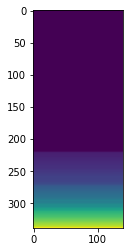

In [71]:
plt.imshow((Source_func[0,1,1215:,12:152]))
#plt.plot()

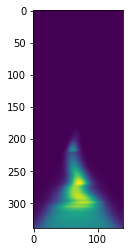

In [72]:
plt.imshow(Chi[0,1,1215:,12:152])

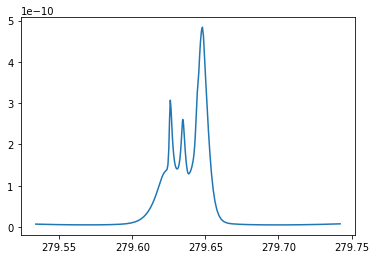

In [41]:
plt.plot(wave_mg[indices[12:152]],I_sp[0,0,indices[12:152]])

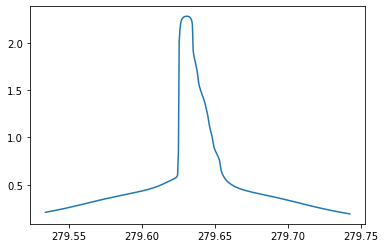

In [46]:
plt.plot(wave_mg[indices[12:152]],Tau_ht[0,0,indices[12:152]]/1e6)

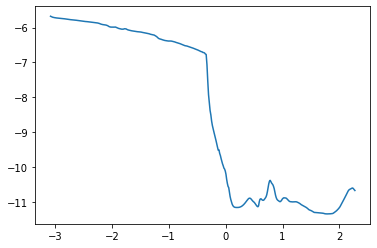

In [79]:
plt.plot(z[0,1220:]/1e6,np.log10(Source_func[0,0,1220:,130]))

In [57]:
z[0,15]/1e6

2.272336

In [136]:
temp_juan.shape, vel_juan.shape

((1, 6930, 90, 1554), (1, 6930, 90, 1554))

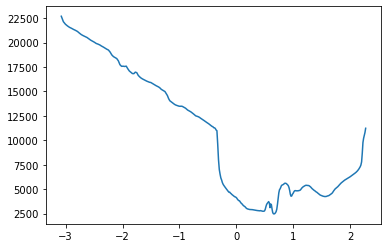

In [80]:
plt.plot(z[0,1220:]/1e6,temp_juan[0,4860,10,1220:])

In [9]:
data_ray_aux.atmos.height_scale.shape

(1, 2, 1554)

In [29]:
#--- Computing the optical depths at different frequencies----

from scipy import integrate
tau_lambda=np.zeros((140,339))
for wl in range(140):
    height = data_ray_aux.atmos.height_scale[0, 0].dropna('height')
    tau_lambda_test = integrate.cumtrapz(data_ray_aux.ray.chi[0, 0, :, 12+wl].dropna('height'), x=-height)
    tau_lambda[wl,:]= np.concatenate([[1e-20], tau_lambda_test])

12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151


In [31]:
tau_lambda.shape

(140, 339)

In [44]:
chi = data_ray_aux.ray.chi[0,0,1215:,12:152]
Source_function = data_ray_aux.ray.source_function[0,0,1215:,12:152]

In [41]:
tau_lambda = tau_lambda.T

In [45]:
tau_lambda.shape, chi.shape, Source_function.shape

((339, 140), (339, 140), (339, 140))

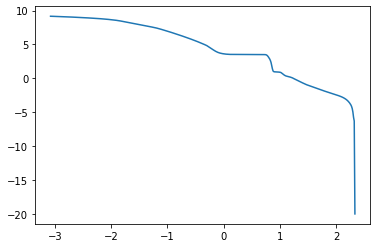

In [39]:
plt.plot(height/1e6, np.log10(tau_lambda[100,:]))

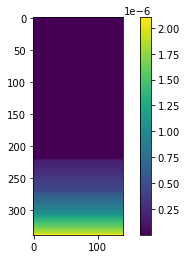

In [167]:
plt.imshow((Source_function))
plt.colorbar()

In [50]:
chi_factor = chi/tau_lambda
tau_factor = tau_lambda*np.exp(-tau_lambda)

In [71]:
chi_factor.min()

<xarray.DataArray 'chi' ()>
array(1.799707e-09)
Coordinates:
    x        float64 6.751e+07
    y        float64 290.0

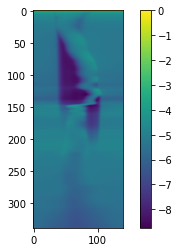

In [117]:
plt.imshow(np.log10(chi_factor),vmax=0)
plt.colorbar()

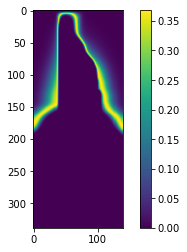

In [60]:
plt.imshow(tau_factor)
plt.colorbar()

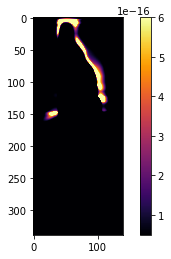

In [193]:
plt.imshow((chi_factor*tau_factor*Source_function),vmax=6e-16,vmin=0.5e-16,cmap='inferno')
plt.colorbar()

In [90]:
z1 = z[0,:]/1e6
z1.shape
Mg_center = 2796.3442391734520/10
dopp_Mgk = ((wave_mg[indices[12:152]]-Mg_center)/Mg_center)*3e5
x1 = dopp_Mgk
extend = (x1.min(),x1.max(),z1.max(),z1.min())
x_pos1=4865-4176
x_pos2=4980-4176

In [102]:
chi_factor.shape

(339, 140)

In [103]:
1410-1214

196

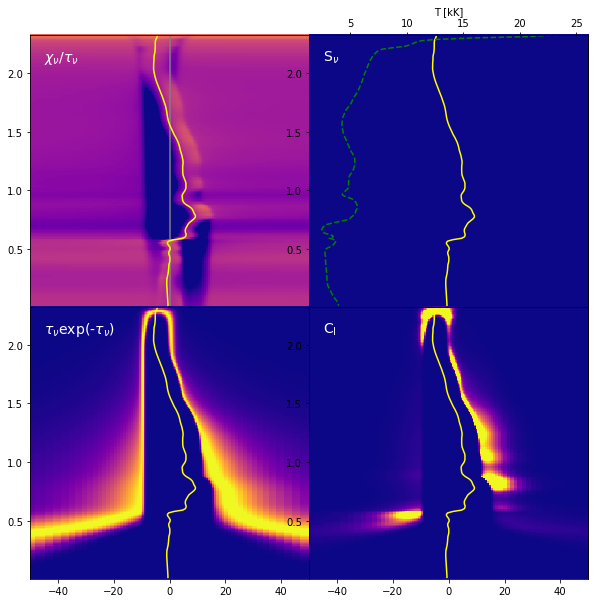

In [210]:
xdopp_minmax=[-50,50]
fig, axs =plt.subplots(2,2,figsize=(10,10),facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = 0.0,wspace=0.0)
axs=axs.ravel()

norm1 = cm.colors.Normalize(vmax=-2, vmin=-7)
im0 = NonUniformImage(axs[0], interpolation='nearest', extent=[xdopp_minmax[0],xdopp_minmax[1],z1[1410],z1[1215]],cmap='plasma',norm=norm1)
im0.set_data(x1,z1[:1214:-1],np.flipud(np.squeeze(np.log10(chi_factor))))
axs[0].set_xlim(-50,50)
axs[0].set_ylim(z1[1410],2.32)
axs[0].images.append(im0)    
#axs[0].plot(dopp_Mgk,Tau_ht[0,0,indices[12:152]]/1e6)
axs[0].axvline(x=0, color='gray')
axs[0].text(-45,2.1,r'$\chi_{\nu}$/$\tau_{\nu}$',color='white',size=14)
axs[0].plot(-1*vel_juan[0,4860,10,1215:1410]/1e3,z1[1215:1410],color='yellow')

norm2 = cm.colors.Normalize(vmax=1.75e-6, vmin=0.25e-6)
im1 = NonUniformImage(axs[1], interpolation='nearest', extent=[xdopp_minmax[0],xdopp_minmax[1],z1[1410],z1[1215]],cmap='plasma',norm=norm2)
im1.set_data(x1,z1[:1214:-1],np.flipud(np.squeeze((Source_function))))
axs[1].set_xlim(-50,50)
axs[1].set_ylim(z1[1410],2.32)
axs[1].images.append(im1)
axs[1].text(-45,2.1,r'S$_{\nu}$',color='white',size=14)
axs[1].plot(-1*vel_juan[0,4860,10,1215:1410]/1e3,z1[1215:1410],color='yellow')

ax2=axs[1].twiny()
#color ='tab:black'
ax2.set_xlabel('T [kK]')
ax2.plot(temp_juan[0,4860,10,1215:1410]/1e3,z1[1215:1410],color='green', linestyle='dashed')

norm3 = cm.colors.Normalize(vmax=0.35, vmin=0)
im2 = NonUniformImage(axs[2], interpolation='nearest', extent=[xdopp_minmax[0],xdopp_minmax[1],z1[1410],z1[1215]],cmap='plasma',norm=norm3)
im2.set_data(x1,z1[:1214:-1],np.flipud(np.squeeze((tau_factor))))
axs[2].set_xlim(-50,50)
axs[2].set_ylim(z1[1410],2.32)
axs[2].images.append(im2)
axs[2].text(-45,2.1,r'$\tau_{\nu}$exp(-$\tau_{\nu}$)',color='white',size=14)
axs[2].plot(-1*vel_juan[0,4860,10,1215:1410]/1e3,z1[1215:1410],color='yellow')

norm4 = cm.colors.Normalize(vmax=7e-16, vmin=0)
im3 = NonUniformImage(axs[3], interpolation='nearest', extent=[xdopp_minmax[0],xdopp_minmax[1],z1[1410],z1[1215]],cmap='plasma',norm=norm4)
im3.set_data(x1,z1[:1214:-1],np.flipud(np.squeeze((chi_factor*tau_factor*Source_function))))
axs[3].set_xlim(-50,50)
axs[3].set_ylim(z1[1410],2.32)
axs[3].images.append(im3)
axs[3].text(-45,2.1,r'C$_{\mathrm{I}}$',color='white',size=14)
axs[3].plot(-1*vel_juan[0,4860,10,1215:1410]/1e3,z1[1215:1410],color='yellow')
#axs[3].plot(I_sp[0,0,indices[12:152]])



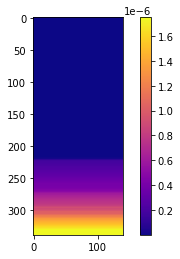

In [202]:
plt.imshow((Source_function),cmap='plasma',vmax=1.75e-6)
plt.colorbar()

In [174]:
Source_function.min(), Source_function.max()

(<xarray.DataArray 'source_function' ()>
 array(2.170911e-12, dtype=float32)
 Coordinates:
     x        float64 6.751e+07
     y        float64 290.0, <xarray.DataArray 'source_function' ()>
 array(2.101462e-06, dtype=float32)
 Coordinates:
     x        float64 6.751e+07
     y        float64 290.0)

In [175]:
np.min(Source_function)

<xarray.DataArray 'source_function' ()>
array(2.170911e-12, dtype=float32)
Coordinates:
    x        float64 6.751e+07
    y        float64 290.0

In [176]:
np.max(Source_function)

<xarray.DataArray 'source_function' ()>
array(2.101462e-06, dtype=float32)
Coordinates:
    x        float64 6.751e+07
    y        float64 290.0